In [155]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [156]:
air_line=pd.read_csv(r"C:\Users\Utilizador\Desktop\Ironhack 2\Logistic Regression\lab-predictions-logistic-regression\Invistico_Airline.csv")
air_line

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [157]:
cols = []
for i in range(len(air_line.columns)):
    cols.append(air_line.columns[i].lower().replace(' ', '_'))
air_line.columns = cols
air_line

,satisfaction,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [158]:
air_line.shape

(129880, 22)

In [159]:
air_line.isna().sum()

satisfaction                           0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
seat_comfort                           0
departure/arrival_time_convenient      0
food_and_drink                         0
gate_location                          0
inflight_wifi_service                  0
inflight_entertainment                 0
online_support                         0
ease_of_online_booking                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
dtype: int64

In [160]:
air_line.drop_duplicates()

,satisfaction,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,...,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [161]:
air_line.dtypes

satisfaction                          object
customer_type                         object
age                                    int64
type_of_travel                        object
class                                 object
flight_distance                        int64
seat_comfort                           int64
departure/arrival_time_convenient      int64
food_and_drink                         int64
gate_location                          int64
inflight_wifi_service                  int64
inflight_entertainment                 int64
online_support                         int64
ease_of_online_booking                 int64
on-board_service                       int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
cleanliness                            int64
online_boarding                        int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
dtype: obj

In [162]:
numericals = air_line.select_dtypes(include=['float64', 'int64'])
numericals

,age,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,29,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,63,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,69,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,66,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


In [163]:
categoricals = air_line.select_dtypes('object')
categoricals

,satisfaction,customer_type,type_of_travel,class
0,satisfied,Loyal Customer,Personal Travel,Eco
1,satisfied,Loyal Customer,Personal Travel,Business
2,satisfied,Loyal Customer,Personal Travel,Eco
3,satisfied,Loyal Customer,Personal Travel,Eco
4,satisfied,Loyal Customer,Personal Travel,Eco
...,...,...,...,...
129875,satisfied,disloyal Customer,Personal Travel,Eco
129876,dissatisfied,disloyal Customer,Personal Travel,Business
129877,dissatisfied,disloyal Customer,Personal Travel,Eco
129878,dissatisfied,disloyal Customer,Personal Travel,Eco


In [164]:
encod_categorical = pd.get_dummies(categoricals, drop_first=True)
encod_categorical

,satisfaction_satisfied,customer_type_disloyal Customer,type_of_travel_Personal Travel,class_Eco,class_Eco Plus
0,1,0,1,1,0
1,1,0,1,0,0
2,1,0,1,1,0
3,1,0,1,1,0
4,1,0,1,1,0
...,...,...,...,...,...
129875,1,1,1,1,0
129876,0,1,1,0,0
129877,0,1,1,1,0
129878,0,1,1,1,0


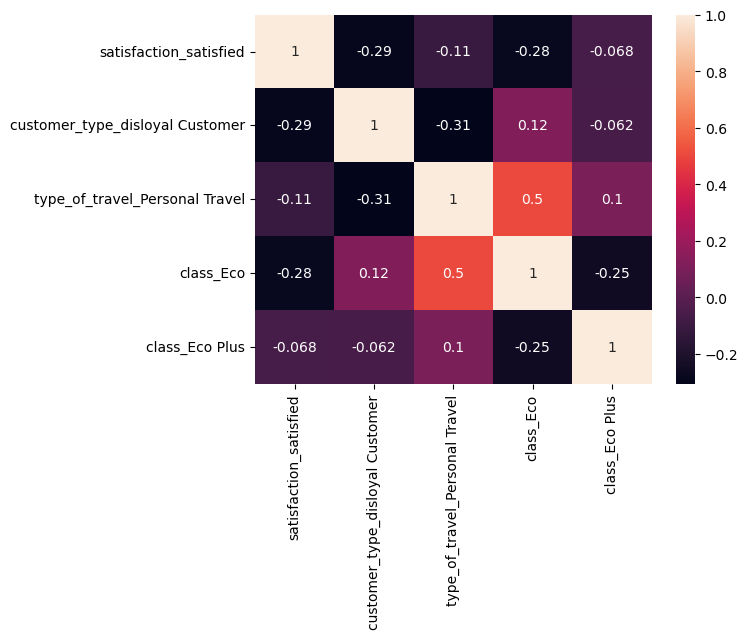

In [165]:
sns.heatmap(encod_categorical.corr(),annot=True)
plt.show()

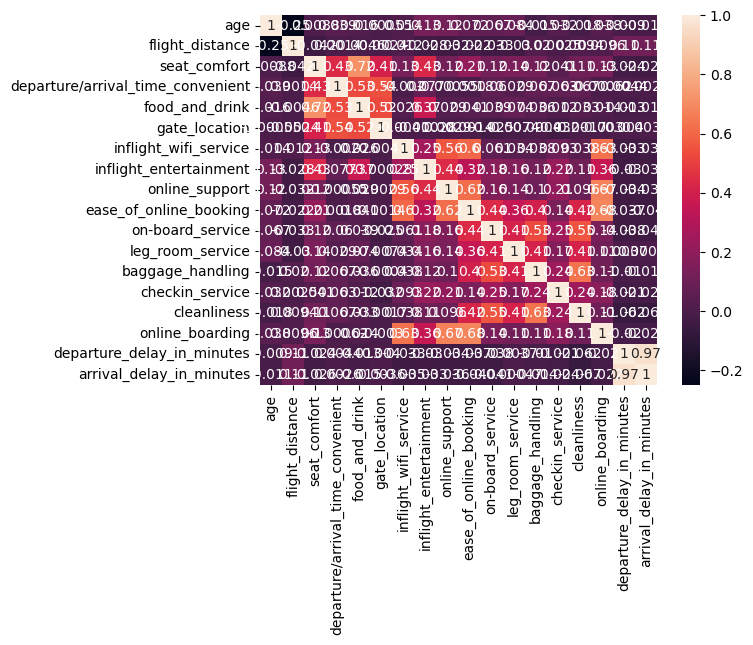

In [166]:
sns.heatmap(numericals.corr(),annot=True)
plt.show()

In [167]:
numericals.drop(['baggage_handling' ,'on-board_service' ,'inflight_wifi_service','online_support','seat_comfort','departure/arrival_time_convenient', 'food_and_drink', 'ease_of_online_booking', 'leg_room_service', 'arrival_delay_in_minutes'], axis=1,inplace=True)
numericals

,age,flight_distance,gate_location,inflight_entertainment,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,65,265,2,4,5,3,2,0
1,47,2464,3,2,2,3,2,310
2,15,2138,3,0,4,4,2,0
3,60,623,3,4,4,1,3,0
4,70,354,3,3,4,2,5,0
...,...,...,...,...,...,...,...,...
129875,29,1731,3,5,4,4,2,0
129876,63,2087,4,1,1,2,1,174
129877,69,2320,3,2,2,3,2,155
129878,66,2450,2,2,2,1,2,193


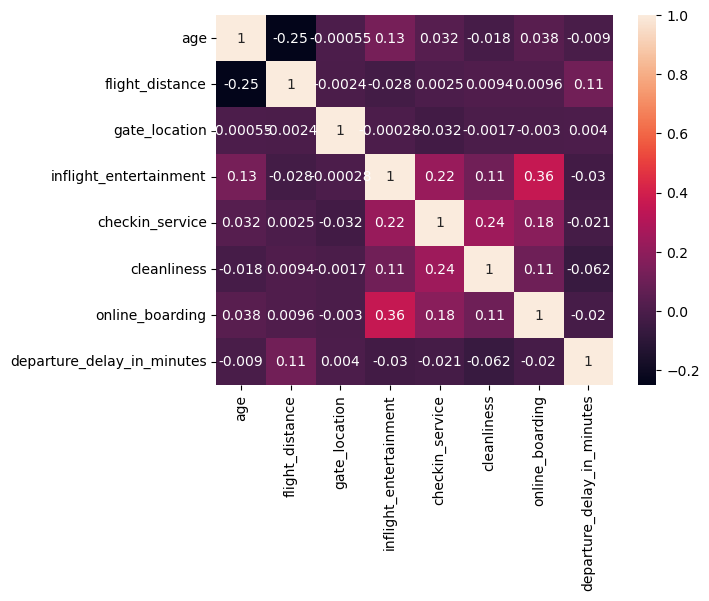

In [168]:
sns.heatmap(numericals.corr(),annot=True)
plt.show()

In [169]:
encod_categorical.drop(['type_of_travel_Personal Travel', 'class_Eco' ],axis = 1, inplace = True)
encod_categorical

,satisfaction_satisfied,customer_type_disloyal Customer,class_Eco Plus
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
129875,1,1,0
129876,0,1,0
129877,0,1,0
129878,0,1,0


In [170]:
numericals.columns

Index(['age', 'flight_distance', 'gate_location', 'inflight_entertainment',
       'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes'],
      dtype='object')

In [171]:
encod_categorical.columns

Index(['satisfaction_satisfied', 'customer_type_disloyal Customer',
       'class_Eco Plus'],
      dtype='object')

In [172]:
air_line = pd.concat([numericals, encod_categorical], axis=1)
air_line

,age,flight_distance,gate_location,inflight_entertainment,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,satisfaction_satisfied,customer_type_disloyal Customer,class_Eco Plus
0,65,265,2,4,5,3,2,0,1,0,0
1,47,2464,3,2,2,3,2,310,1,0,0
2,15,2138,3,0,4,4,2,0,1,0,0
3,60,623,3,4,4,1,3,0,1,0,0
4,70,354,3,3,4,2,5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
129875,29,1731,3,5,4,4,2,0,1,1,0
129876,63,2087,4,1,1,2,1,174,0,1,0
129877,69,2320,3,2,2,3,2,155,0,1,0
129878,66,2450,2,2,2,1,2,193,0,1,0


In [173]:
air_line.columns

Index(['age', 'flight_distance', 'gate_location', 'inflight_entertainment',
       'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'satisfaction_satisfied',
       'customer_type_disloyal Customer', 'class_Eco Plus'],
      dtype='object')

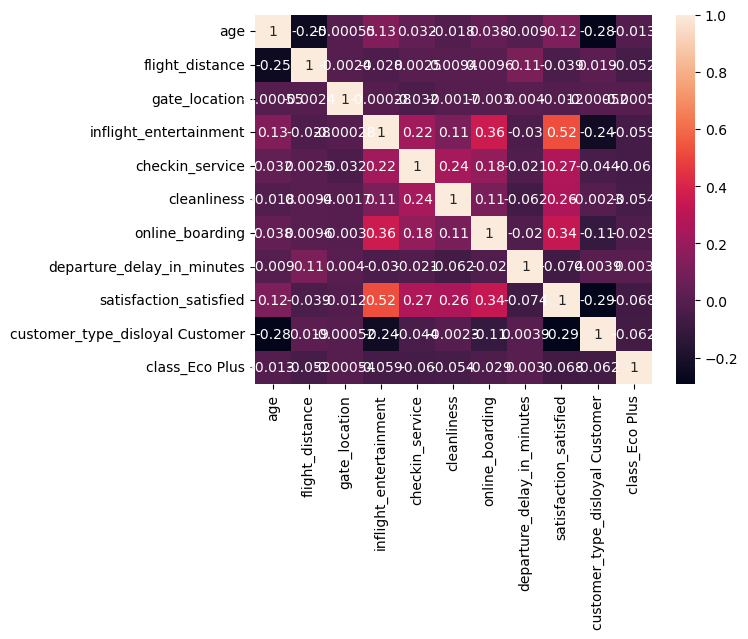

In [174]:
sns.heatmap(air_line.corr(),annot=True)
plt.show()

In [175]:
air_line.groupby('satisfaction_satisfied').count()

,age,flight_distance,gate_location,inflight_entertainment,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,customer_type_disloyal Customer,class_Eco Plus
satisfaction_satisfied,,,,,,,,,,
0,58793,58793,58793,58793,58793,58793,58793,58793,58793,58793
1,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087


In [176]:
X = air_line.drop ('satisfaction_satisfied' , axis = 1)
y = air_line['satisfaction_satisfied']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

LR = LogisticRegression()
LR.fit(X_train, y_train)

LR.score(X_test, y_test)

accuracy = LR.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7548506313520172


In [181]:
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report 

 

pred = LR.predict(X_test)  
pred

print("Precison is: ",precision_score(y_test, pred))
print("Recall is: ",recall_score(y_test, pred))
print("F1 is: ",f1_score(y_test, pred))

print(classification_report(y_test, pred))

Precison is:  0.7453758119393752
Recall is:  0.8425284945108734
F1 is:  0.7909801089739382
              precision    recall  f1-score   support

           0       0.77      0.65      0.70     11675
           1       0.75      0.84      0.79     14301

    accuracy                           0.75     25976
   macro avg       0.76      0.74      0.75     25976
weighted avg       0.76      0.75      0.75     25976



In [183]:
from sklearn.metrics import confusion_matrix 

confusion_matrix(y_test, pred)

array([[ 7559,  4116],
       [ 2252, 12049]], dtype=int64)

In [185]:
predict_prob = LR.predict_proba(X_test)[0:,1]
predict_prob


threshold = 0.7 
costum_pred = (predict_prob >= threshold).astype(int)
costum_pred

array([1, 0, 1, ..., 0, 0, 0])

In [189]:
from imblearn.over_sampling  import SMOTE


sm = SMOTE(random_state=0, sampling_strategy=1.0)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)


train_smote = pd.concat([X_train_SMOTE, y_train_SMOTE], axis =1)
train_smote 

LR = LogisticRegression(max_iter = 1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)

pred = LR.predict(X_test) 
pred

print("Accuracy: ",LR.score(X_test, y_test))

print("Precison is: ",precision_score(y_test, pred))
print("Recall is: ",recall_score(y_test, pred))
print("F1 is: ",f1_score(y_test, pred))

print(classification_report(y_test, pred))

Accuracy:  0.8042808746535264
Precison is:  0.827750515610554
Recall is:  0.8138591706873646
F1 is:  0.8207460686834497
              precision    recall  f1-score   support

           0       0.78      0.79      0.78     11675
           1       0.83      0.81      0.82     14301

    accuracy                           0.80     25976
   macro avg       0.80      0.80      0.80     25976
weighted avg       0.80      0.80      0.80     25976

